# Decision Tree
## Mobile Price Classification - ML Assignment 2

This notebook implements **Decision Tree** for mobile price classification.

### Dataset:
- 20 features (mobile specifications)
- 2000 samples
- 4 classes (price ranges: 0, 1, 2, 3)

### Evaluation Metrics:
- Accuracy
- AUC Score
- Precision
- Recall
- F1 Score
- MCC Score

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report
)
import pickle
import warnings
warnings.filterwarnings('ignore')

print('✓ All libraries imported successfully')

✓ All libraries imported successfully


In [26]:
# Load dataset
print('Loading dataset...')
df = pd.read_csv('../data/train.csv')

print(f'✓ Dataset loaded: {df.shape}')
print(f'  Features: {df.shape[1] - 1}')
print(f'  Samples: {df.shape[0]}')

# Display first few rows
df.head()

Loading dataset...
✓ Dataset loaded: (1399, 21)
  Features: 20
  Samples: 1399


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Target Distribution:
price_range
0    345
1    339
2    353
3    362
Name: count, dtype: int64


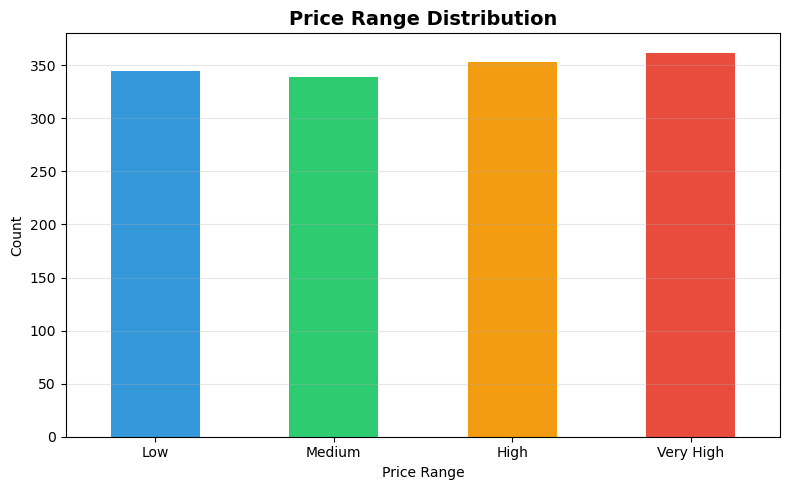

In [27]:
# Target distribution
print('Target Distribution:')
print(df['price_range'].value_counts().sort_index())

# Visualize
plt.figure(figsize=(8, 5))
df['price_range'].value_counts().sort_index().plot(
    kind='bar',
    color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
)
plt.title('Price Range Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Low', 'Medium', 'High', 'Very High'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')

Training samples: 1119
Testing samples: 280


In [29]:
# Feature Scaling: Not required for tree-based models
print('✓ Feature scaling not required for this model')

✓ Feature scaling not required for this model


In [30]:
# Train Decision Tree
print('Training model...')

model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

print('✓ Training completed!')

Training model...
✓ Training completed!


In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Get probabilities if available
if hasattr(model, 'predict_proba'):
    y_pred_proba = model.predict_proba(X_test)
else:
    y_pred_proba = None

print('✓ Predictions completed')

✓ Predictions completed


In [32]:
# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

# AUC Score
if y_pred_proba is not None:
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
    auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')
else:
    auc = 0.0

# Display
print('='*60)
print('EVALUATION METRICS - DECISION TREE')
print('='*60)
print(f'Accuracy:  {accuracy:.4f}')
print(f'AUC Score: {auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')
print(f'MCC Score: {mcc:.4f}')
print('='*60)

EVALUATION METRICS - DECISION TREE
Accuracy:  0.8393
AUC Score: 0.9023
Precision: 0.8398
Recall:    0.8393
F1 Score:  0.8390
MCC Score: 0.7861


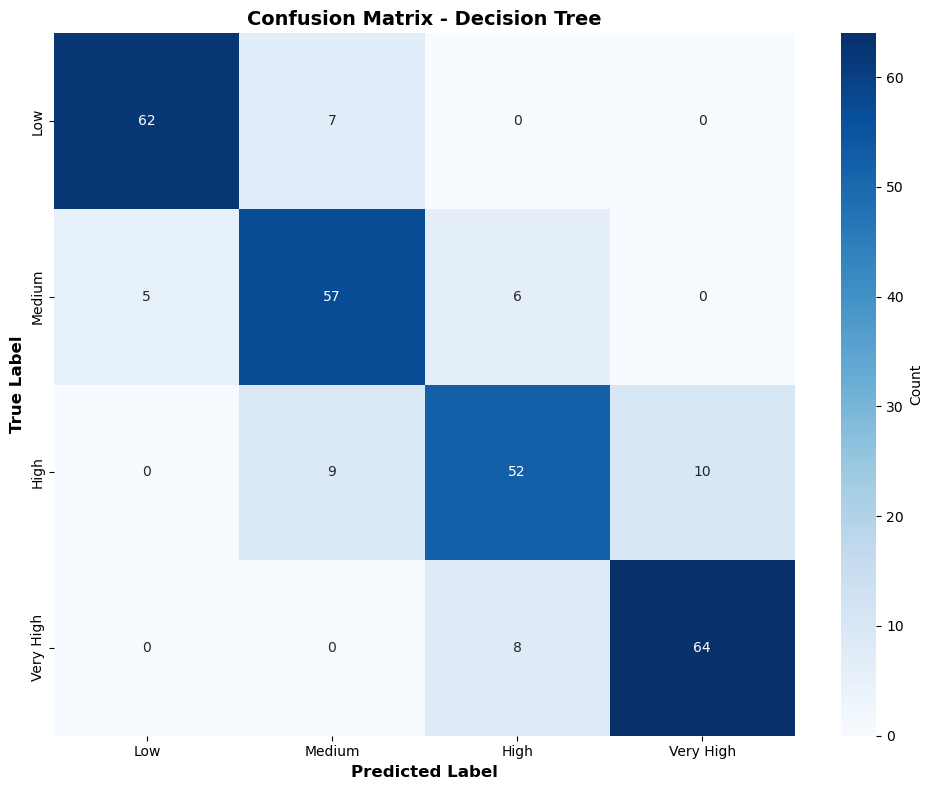

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'],
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [34]:
# Classification Report
print('Classification Report:')
print('='*60)
report = classification_report(
    y_test, y_pred,
    target_names=['Low', 'Medium', 'High', 'Very High'],
    digits=4
)
print(report)

Classification Report:
              precision    recall  f1-score   support

         Low     0.9254    0.8986    0.9118        69
      Medium     0.7808    0.8382    0.8085        68
        High     0.7879    0.7324    0.7591        71
   Very High     0.8649    0.8889    0.8767        72

    accuracy                         0.8393       280
   macro avg     0.8397    0.8395    0.8390       280
weighted avg     0.8398    0.8393    0.8390       280



In [35]:
# Decision Tree Analysis
print(f'Tree Depth: {model.get_depth()}')
print(f'Number of Leaves: {model.get_n_leaves()}')

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nTop 10 Features:')
print(feature_importance.head(10))

Tree Depth: 10
Number of Leaves: 108

Top 10 Features:
          Feature  Importance
13            ram    0.651770
0   battery_power    0.110160
11      px_height    0.088256
12       px_width    0.080082
8       mobile_wt    0.012913
6      int_memory    0.011043
15           sc_w    0.007176
10             pc    0.007024
7           m_dep    0.006564
14           sc_h    0.005655


In [36]:
# Save model and results
with open('../model/artifacts/decision_tree.pkl', 'wb') as f:
    pickle.dump(model, f)
print('✓ Model saved to: decision_tree.pkl')

# Save results
results_df = pd.DataFrame([{
    'Model': 'Decision Tree',
    'Accuracy': round(accuracy, 4),
    'AUC': round(auc, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4),
    'MCC': round(mcc, 4)
}])

results_df.to_csv('../model/submission_csv/decision_tree_results.csv', index=False)
print('✓ Results saved')

results_df

✓ Model saved to: decision_tree.pkl
✓ Results saved


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Decision Tree,0.8393,0.9023,0.8398,0.8393,0.839,0.7861
